## Installing Libraries

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install plotly==5.3.1
!pip3 install dash
!pip3 install pycountry

     |████████████████████████████████| 23.9 MB 2.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 7.3 MB 5.3 MB/s 
     |████████████████████████████████| 357 kB 51.2 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=83e7b0dd4568fd102693853569e151e75690288fd9eaf62f17ba4595d14d0ca1
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=9ad6eb69d301374e97fc96c2124c59faa0e3c22fb82e8b6cc2fc6040faec7e92
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=aba2cb1ca75d04a

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

%matplotlib inline
plt.style.use('fivethirtyeight')

## Get Dataset
Before we can start manipulating and playing around with the data we need to load it. This could be done in a few ways:

- You can have the dataset directly on your drive
- You can provide a link to where the dataset lives (our case)
- You could also grab it directly from a GitHub repo

In [3]:
COUNTRIES_AGG = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
US_CONFIRMED = "https://raw.githubusercontent.com/datasets/covid-19/main/data/us_confirmed.csv"
US_DEATHS = "https://raw.githubusercontent.com/datasets/covid-19/main/data/us_deaths.csv"
WORLDWIDE_AGG = "https://raw.githubusercontent.com/datasets/covid-19/main/data/worldwide-aggregate.csv"

In [4]:
# Load the Countries Aggregate dataframe
# parse_dates tells the pandas to format the Data column
cont_agg = pd.read_csv(COUNTRIES_AGG, parse_dates=["Date"])

In [5]:
cont_agg.head() # print top 5 rows

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


## Total Worldwide Cases

In [6]:
# Count the number of Confirmed, Recovered, Deaths for a given Date for each country
# Axis=1 refers to Top-Bottom or Column wise, Axis=0 refers to row wise
cont_agg['Total_Cases'] = cont_agg[["Confirmed",  "Recovered", "Deaths"]].sum(axis=1)

## United States vs. Worldwide Cases

Another question that we can ask is: How many of the Worldwise cases are made up by the US? 

This is a good question because it allows us to see the breakdown of how many cases are happening with in the USA.

In [7]:
# filtered the country aggregate dataframe by country. 
# Here we choose the US, and group by Date and take the sum of
# Confirmed, Recovered, and Deaths for each date
us_df = cont_agg[cont_agg["Country"] == "US"].groupby(["Date"]).sum()

## Daily United States Cases and Deaths

In this section we will answer the following question: How does the Cases and Deaths distribution look for the US? What are the dates were there are spikes? During which interval did we see the most deaths/cases? 

In [8]:
# reset the index from Dates to zero-indexing
us_df = us_df.reset_index()

In [9]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [10]:
# Create a new column within us_df to calculate the number of Daily Confirmed Cases
# Count the number of confirmed cases in order
# So we need to for each row subsequently
# Since the rows are already ordered by Date
us_df["Daily_Confirmed"] = us_df["Confirmed"].sub(us_df["Confirmed"].shift()) 

In [11]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases,Daily_Confirmed
0,2020-01-22,1,0,0,1,NaN
1,2020-01-23,1,0,0,1,0.0
2,2020-01-24,2,0,0,2,1.0
3,2020-01-25,2,0,0,2,0.0
4,2020-01-26,5,0,0,5,3.0


In [12]:
# Do the same for Daily Deaths
us_df["Daily_Deaths"] = us_df["Deaths"].sub(us_df["Deaths"].shift()) 

In [13]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases,Daily_Confirmed,Daily_Deaths
0,2020-01-22,1,0,0,1,NaN,NaN
1,2020-01-23,1,0,0,1,0.0,0.0
2,2020-01-24,2,0,0,2,1.0,0.0
3,2020-01-25,2,0,0,2,0.0,0.0
4,2020-01-26,5,0,0,5,3.0,0.0


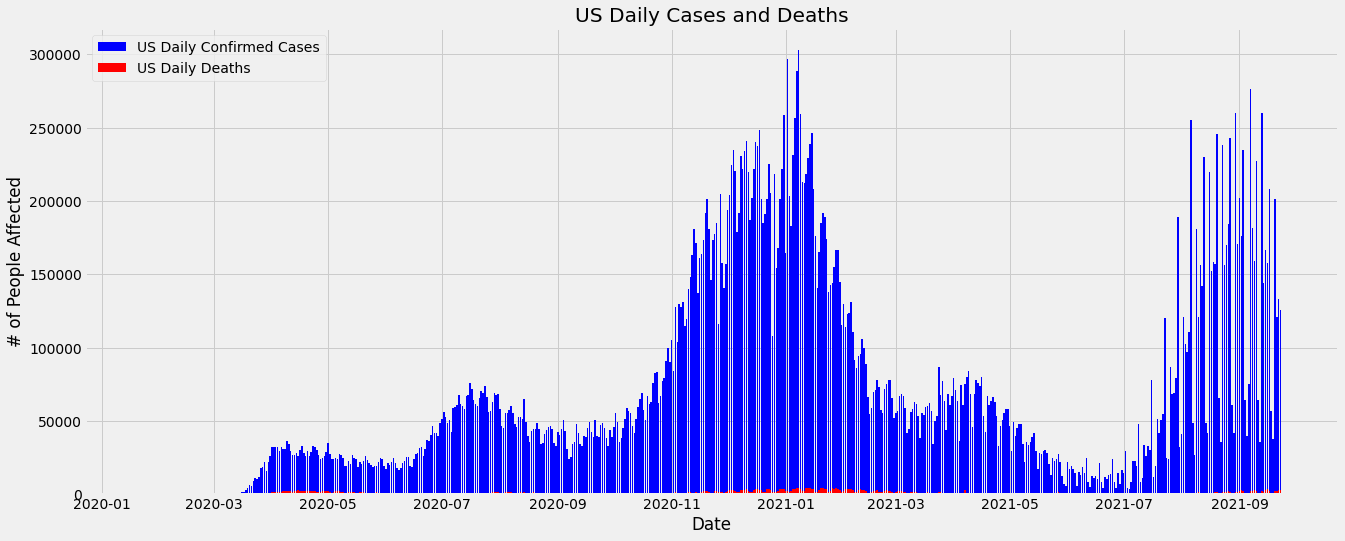

In [14]:
# create another figure
# this time width 20 and height 8
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
# plot Date as x axis and Daily Confirmed as y axis
ax.bar(us_df["Date"], us_df["Daily_Confirmed"], color="b", label="US Daily Confirmed Cases")
# plot Date as x axis and Daily Deaths as y axis
ax.bar(us_df["Date"], us_df["Daily_Deaths"], color="r", label="US Daily Deaths")
# set x label
ax.set_xlabel("Date")
# set y label
ax.set_ylabel("# of People Affected")
# set title
ax.title.set_text("US Daily Cases and Deaths")

plt.legend(loc="upper left")
plt.show()

## US Deaths

Lets vizualise the number of deaths for each state on a given day

In [15]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [16]:
# create a new DataFrame with just the deaths from the US
us_deaths_df = pd.read_csv(US_DEATHS, parse_dates=['Date'])

In [17]:
us_deaths_df.head()

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama


In [18]:
# count the number of deaths with respect to the province/state
us_deaths_df = us_deaths_df.groupby(["Province/State"]).sum()

In [19]:
us_deaths_df.head() 

,Case
Province/State,
Alabama,3306774
Alaska,106253
American Samoa,0
Arizona,5485655
Arkansas,1815556


In [20]:
# Rename the columns to make it easier to read
us_deaths_df = us_deaths_df.reset_index().rename(columns={"Province/State": "State"})

In [21]:
us_deaths_df.head()

,State,Case
0,Alabama,3306774
1,Alaska,106253
2,American Samoa,0
3,Arizona,5485655
4,Arkansas,1815556


In [22]:
# remove the rows that have state/provinces that are not listed in our codes list
# this includes the areas outside the US
us_deaths_df = us_deaths_df[us_deaths_df["State"].map(lambda x: x in list(code.keys()))]


In [23]:
# map each state/province to its designated code
us_deaths_df["Code"] = us_deaths_df["State"].map(code)

In [24]:
us_deaths_df.head()

,State,Case,Code
0,Alabama,3306774,AL
1,Alaska,106253,AK
3,Arizona,5485655,AZ
4,Arkansas,1815556,AR
5,California,18345244,CA


## Choropleth Maps

They require
- Geometry information, this can be supplied by GeoJSON file where each feature has either an id filed or some idetfying value in properties; or
- one of the built-in geometries within plotly: US state and world coutries
- A list of values indexed by feature identifies

In [25]:
fig = px.choropleth(us_deaths_df, locations='Code', 
                    color="Case",
                    color_continuous_scale="matter",
                    hover_name="State",
                    locationmode="USA-states",
                    labels={"Case": "COVID-19 Deaths"},
                    scope="usa")

fig.show()

## China Map

In [26]:
china_df = cont_agg[cont_agg["Country"] == "China"].groupby(["Date"]).sum()

In [27]:
china_df["Daily_Confirmed"] = china_df["Confirmed"].sub(china_df["Confirmed"].shift())

In [28]:
china_df["Daily_Deaths"] = china_df["Deaths"].sub(china_df["Deaths"].shift())

In [29]:
china_df = china_df.reset_index() #resetting to include date column in graph
china_df = china_df.drop(china_df.index[0:246]) #only want up to a year's worth of data,so drop first 244 columns

In [30]:
print(china_df)

          Date  Confirmed  ...  Daily_Confirmed  Daily_Deaths
246 2020-09-24      90424  ...             15.0           0.0
247 2020-09-25      90441  ...             17.0           1.0
248 2020-09-26      90456  ...             15.0           0.0
249 2020-09-27      90483  ...             27.0           0.0
250 2020-09-28      90505  ...             22.0           0.0
..         ...        ...  ...              ...           ...
606 2021-09-19     107961  ...             52.0           0.0
607 2021-09-20     108038  ...             77.0           0.0
608 2021-09-21     108080  ...             42.0           0.0
609 2021-09-22     108124  ...             44.0           0.0
610 2021-09-23     108180  ...             56.0           0.0

[365 rows x 7 columns]


In [31]:
line_colors = ['green', 'red']

fig = px.line(china_df, 
              x = 'Date', 
              y = "Daily_Deaths",
              color_discrete_sequence = line_colors)

fig.add_scatter(x=china_df["Date"], 
                y= china_df["Daily_Deaths"],
                mode="lines", 
                name="Deaths")

fig.add_scatter(x=china_df["Date"], 
                y= china_df["Daily_Confirmed"],
                mode="lines", 
                name="Confirmed")

fig.update_layout(title='China Daily COVID Deaths vs. Daily Confirmed',
                   xaxis_title='Date',
                   yaxis_title='# of People Affected',
                  hovermode="x")

fig.show()

## Worldwide Daily Covid Cases Map


In [32]:
import pandas as pd
import plotly.express as px

#create a new dataframe & import our data
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")



In [33]:
#Output the first 5 rows of the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN


In [34]:
# Sort our data by date
df = df.sort_values(by=['date'])



In [35]:
fig = px.choropleth(df, locations="iso_code",
                    color="new_cases",
                    hover_name="location",
                    animation_frame="date",
                    title = "Daily new COVID cases",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")
fig.show()

# Confirmed, Recovered and Death Cases Across the Globe

In [37]:
!pip3 install pycountry

#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import pycountry

%matplotlib inline

# read the csv file and store into the new dataframe
df_cases = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
# use the groupby function to group the data according to the column 'Country' and afterwards aggregate it using the function sum.
# store the output into the same dataframe
df_cases = df_cases.groupby('Country').agg('sum')

In [38]:
#from the dataframe, list all the columns excluding the country column and store it into a new variable
datelist = list(df_cases.columns)

In [39]:
#define a method/function that produces the iso names 
def get_country_code(name):
    try:
      #from the library pycountry- access the the countries columns and 
      #lookup for the name of the specific country and find its 3-letter country code
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# use index to find a country from our dataframe and 
# then use that country and apply its country code using the function.  
df_cases['country'] = df_cases.index
df_cases['iso_alpha_3'] = df_cases['country'].apply(get_country_code)


In [41]:
#using the melt function to "unpivot"/manipulate dataframe from wide to long format
#now we have one or more columns as the identifier variables - id_vars - country and iso names
# other oclumns are non-identifier cols - value_vars - date_list
df_long = pd.melt(df_cases, id_vars=['country','iso_alpha_3'], value_vars = datelist)

In [42]:
# Input dataframe and control the appearance of the map onto which data is plotted 
fig = px.choropleth(df_long,
                     # identify country code column
                     locations ="iso_alpha_3",
                     # color the map based on the values we have 
                     color = "value",
                     # identify hover name
                     hover_name= "country",
                     # identify date column
                     animation_frame= "variable",
                     # select projection / how you want oyur map to look like 
                     projection="orthographic",         # try 'natural earth'
                     # select prefer color scale
                     color_continuous_scale = 'peach',  #customise- tealgrn/ylgnbu
                     # select range of dataset
                     range_color=[0, 50000]
                     )        
fig.show() 